In [ ]:
pip install matplotlib pandas numpy plotly seaborn lightgbm scikit-learn

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**We are reading the train, validation and test splits.**

In [ ]:
 train = pd.read_csv(r"C:\Users\User\Videos\UTS\ꞮꞮꞮ.Semester\iLab 2\Countries\Greece\Wildfire Prediction\Greece_wildfire_prediction\data\Train, valid and test\train.csv" )
valid = pd.read_csv(r"C:\Users\User\Videos\UTS\ꞮꞮꞮ.Semester\iLab 2\Countries\Greece\Wildfire Prediction\Greece_wildfire_prediction\data\Train, valid and test\valid.csv" )
test = pd.read_csv(r"C:\Users\User\Videos\UTS\ꞮꞮꞮ.Semester\iLab 2\Countries\Greece\Wildfire Prediction\Greece_wildfire_prediction\data\Train, valid and test\test.csv")

**We are setting our target feature columns.**

In [ ]:
features = [
    'latitude', 'longitude', 'month',
    'fire_cnt_before', 'fire_before',
    'fire_cnt_last_year', 'fire_last_year',
    'fire_cnt_last_year_same_month', 'fire_last_year_same_month',
    'temperature_min', 'temperature_max', 'temperature_avg'
]

In [ ]:
test.columns
test[features].columns
test[features].head()

Index(['latitude', 'longitude', 'year', 'month', 'fire_cnt', 'fire',
       'fire_cnt_before', 'fire_before', 'fire_cnt_last_year',
       'fire_last_year', 'fire_cnt_last_year_same_month',
       'fire_last_year_same_month', 'temperature_min', 'temperature_avg',
       'temperature_max'],
      dtype='object')

Index(['latitude', 'longitude', 'month', 'fire_cnt_before', 'fire_before',
       'fire_cnt_last_year', 'fire_last_year', 'fire_cnt_last_year_same_month',
       'fire_last_year_same_month', 'temperature_min', 'temperature_max',
       'temperature_avg'],
      dtype='object')

,latitude,longitude,month,fire_cnt_before,fire_before,fire_cnt_last_year,fire_last_year,fire_cnt_last_year_same_month,fire_last_year_same_month,temperature_min,temperature_max,temperature_avg
0,35.0,25.7,7,0.0,0.0,0.0,0.0,0.0,0.0,21.0,32.1,26.6
1,35.0,25.7,7,0.0,0.0,0.0,0.0,0.0,0.0,21.0,32.1,26.6
2,35.0,25.7,7,0.0,0.0,0.0,0.0,0.0,0.0,21.0,32.1,26.6
3,35.0,25.7,7,0.0,0.0,0.0,0.0,0.0,0.0,21.0,32.1,26.6
4,35.0,25.7,7,0.0,0.0,0.0,0.0,0.0,0.0,21.0,32.1,26.6


**We are creating dataset objects for our LGBM model, setting our optimized hyper-parameters and finally initializing the training with also enabling early-stopping by setting the validation split.**

In [ ]:
!pip install lightgbm --upgrade

In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(train[features], label=train.fire)
valid_data = lgb.Dataset(valid[features], label=valid.fire)

parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 1337,
    'early_stopping_round': 20,
    'reg_alpha': 1.0,  # Increase regularization
    'reg_lambda': 1.0,  # Increase regularization
    'num_leaves': 20,
}

num_round = 500

model = lgb.train(parameters, train_data, num_round, valid_sets=[valid_data])


[LightGBM] [Info] Number of positive: 154, number of negative: 9974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 10128, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015205 -> initscore=-4.170784
[LightGBM] [Info] Start training from score -4.170784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

**Running prediction on the test set. For metric calculations, we also binarize the results.**

In [ ]:
test_predictions = model.predict(test[features])
test_binary_predictions = (test_predictions>=0.1).astype(int)

**Plotting the confusion matrix.**

<Axes: >

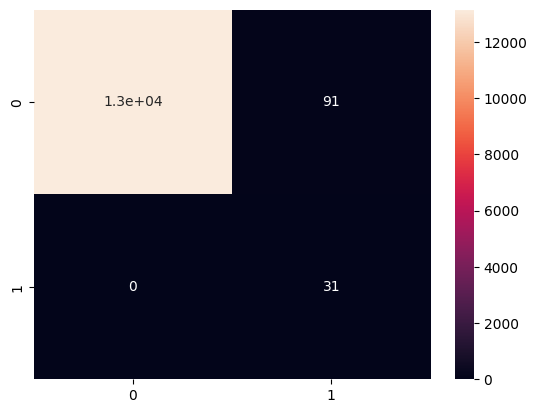

In [ ]:
cm = confusion_matrix(test.fire, test_binary_predictions)
sns.heatmap(cm, annot=True)

Plotting the general binary-classification report.



In [ ]:
print(classification_report(test.fire, test_binary_predictions, target_names=["not fire", "fire"]))

              precision    recall  f1-score   support

    not fire       1.00      0.99      1.00     13240
        fire       0.25      1.00      0.41        31

    accuracy                           0.99     13271
   macro avg       0.63      1.00      0.70     13271
weighted avg       1.00      0.99      1.00     13271



ROC-AUC Score.

In [ ]:
test_auc = roc_auc_score(test.fire, test_predictions)
test_auc

0.9965634441087613

ROC/AUC Curve.

In [ ]:
pip install nbformat

In [ ]:
pip install --upgrade nbformat

In [ ]:
fpr, tpr, thr = roc_curve(test.fire, test_predictions)
px.line(pd.DataFrame(dict(FPR=fpr, TPR=tpr)),
        x='FPR', y='TPR', title='Fire/hotspot model performance for 2023')

Decision tree visualization.

<Axes: >

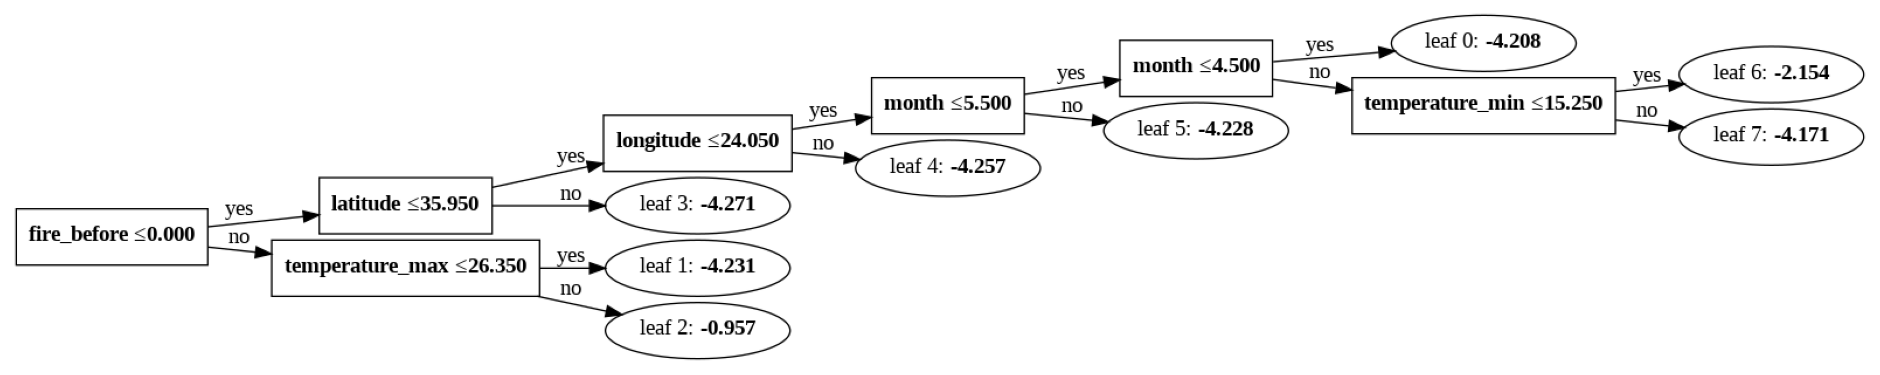

In [ ]:
fig, ax = plt.subplots(figsize=(24, 18))
lgb.plot_tree(model, ax=ax)

Exporting the trained model

In [ ]:
model.save_model("Greece_Wildfire_Prediction_Model")